## 구내식당_모델링 (랜덤포레스트_bootstrap=False)

## 사용 패키지

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 데이터 로드

In [3]:
train = pd.read_csv('C:/Users/juyeo/Desktop/구내식당/train.csv')
test = pd.read_csv('C:/Users/juyeo/Desktop/구내식당/test.csv')
submission = pd.read_csv('C:/Users/juyeo/Desktop/구내식당//sample_submission.csv')

## 요일을 숫자로 매핑

In [4]:
train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

## 수치 데이터만 피쳐로 선택

In [5]:
x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
y1_train = train['중식계']
y2_train = train['석식계']

x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

## 랜덤포레스트_붓스트랩 = False (점심)

In [13]:
## 훈련데이터 분리
x1_train, x1_test, x2_train, x2_test = train_test_split(x_train, y1_train, test_size=0.2, random_state=1)

## 랜덤포레스트 (베이스라인)
model1 = RandomForestRegressor(n_jobs=-1, random_state=42, criterion='mae',bootstrap=False)
model1.fit(x1_train, x2_train)
x2_train_pred = model1.predict(x1_train)
x2_test_pred = model1.predict(x1_test)

## 성능 평가 (R-squared 상관계수)
print('훈련 MAE: %.3f, 테스트 MAE: %.3f' %(mean_squared_error(x2_train, x2_train_pred), mean_squared_error(x2_test, x2_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' %(r2_score(x2_train, x2_train_pred), r2_score(x2_test, x2_test_pred)))

훈련 MAE: 21.673, 테스트 MAE: 18467.575
훈련 R^2: 1.000, 테스트 R^2: 0.578


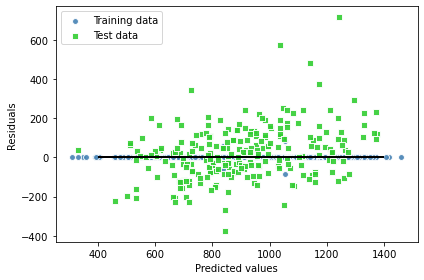

In [7]:
## 잔차그래프
plt.scatter(x2_train_pred, x2_train_pred - x2_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(x2_test_pred, x2_test_pred - x2_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=400, xmax=1400, lw=2, color='black')
plt.tight_layout()
plt.show()

In [ ]:
붓스트랩 True 와 비교
심각한 과적합

## 랜덤포레스트_붓스트랩 = False (저녁)

In [8]:
## 훈련데이터 분리
x1_train, x1_test, x2_train, x2_test = train_test_split(x_train, y2_train, test_size=0.2, random_state=1)

## 랜덤포레스트 (베이스라인)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42, criterion='mae',bootstrap=False)
model2.fit(x1_train, x2_train)
x2_train_pred = model2.predict(x1_train)
x2_test_pred = model2.predict(x1_test)

## 성능 평가 (R-squared 상관계수)
print('훈련 MAE: %.3f, 테스트 MAE: %.3f' %(mean_squared_error(x2_train, x2_train_pred), mean_squared_error(x2_test, x2_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' %(r2_score(x2_train, x2_train_pred), r2_score(x2_test, x2_test_pred)))

훈련 MSE: 113.232, 테스트 MSE: 14204.787
훈련 R^2: 0.994, 테스트 R^2: 0.297


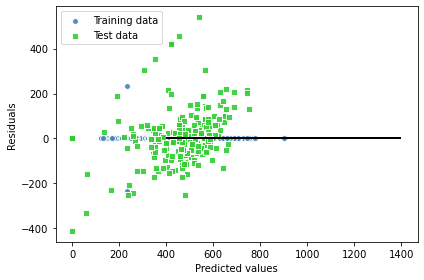

In [9]:
## 잔차그래프
plt.scatter(x2_train_pred, x2_train_pred - x2_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(x2_test_pred, x2_test_pred - x2_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=400, xmax=1400, lw=2, color='black')
plt.tight_layout()
plt.show()

## 추론

In [10]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

## 결과 제출

In [ ]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [ ]:
submission.to_csv('sample_submission.csv', index=False)

In [ ]:
submission = pd.read_csv('C:/Users/juyeo/Desktop/구내식당//sample_submission.csv')

In [ ]:
submission